In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
craig_data=pd.read_csv("/kaggle/input/craiglist-dataset/craigslist_vehicles.csv")

In [5]:
# List of columns to remove
columns_to_remove = ['county', 'id', 'url', 'region', 'region_url', 'image_url', 'lat', 'size', 'long']
# Drop the specified columns
craig_data = craig_data.drop(columns=columns_to_remove)

In [6]:
# Replace missing values with median for numerical columns
numerical_columns = craig_data.select_dtypes(include=['int64', 'float64'])
craig_data[numerical_columns.columns] = craig_data[numerical_columns.columns].fillna(craig_data[numerical_columns.columns].median())

# Replace missing values with mode for categorical columns
categorical_columns = craig_data.select_dtypes(include=['object'])
for column in categorical_columns.columns:
    craig_data[column].fillna(craig_data[column].mode()[0], inplace=True)

# Convert the 'posting_date' column to datetime
craig_data['posting_date'] = pd.to_datetime(craig_data['posting_date'])

# Set 'posting_date' as the index
craig_data.set_index('posting_date', inplace=True)



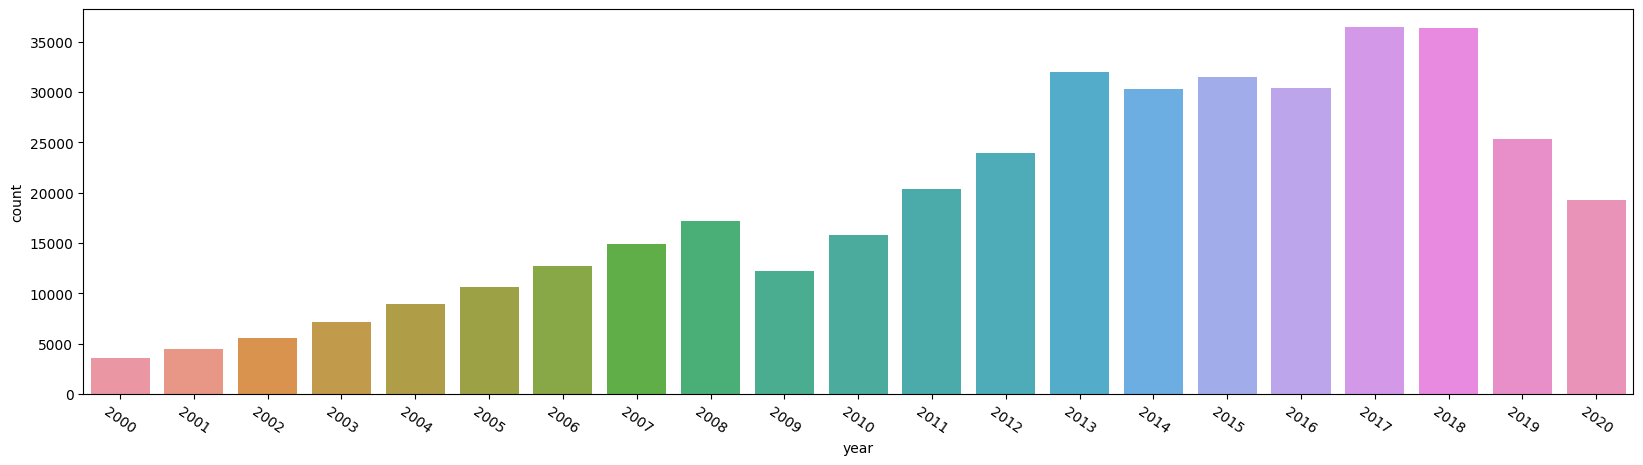

In [8]:
#EDA
#COMPARE VEHICLE PURCHASEPER YEAR
import matplotlib.pyplot as plt
import seaborn as sns

df_year = craig_data[(craig_data["year"]>1999) & (craig_data["year"]<2021)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

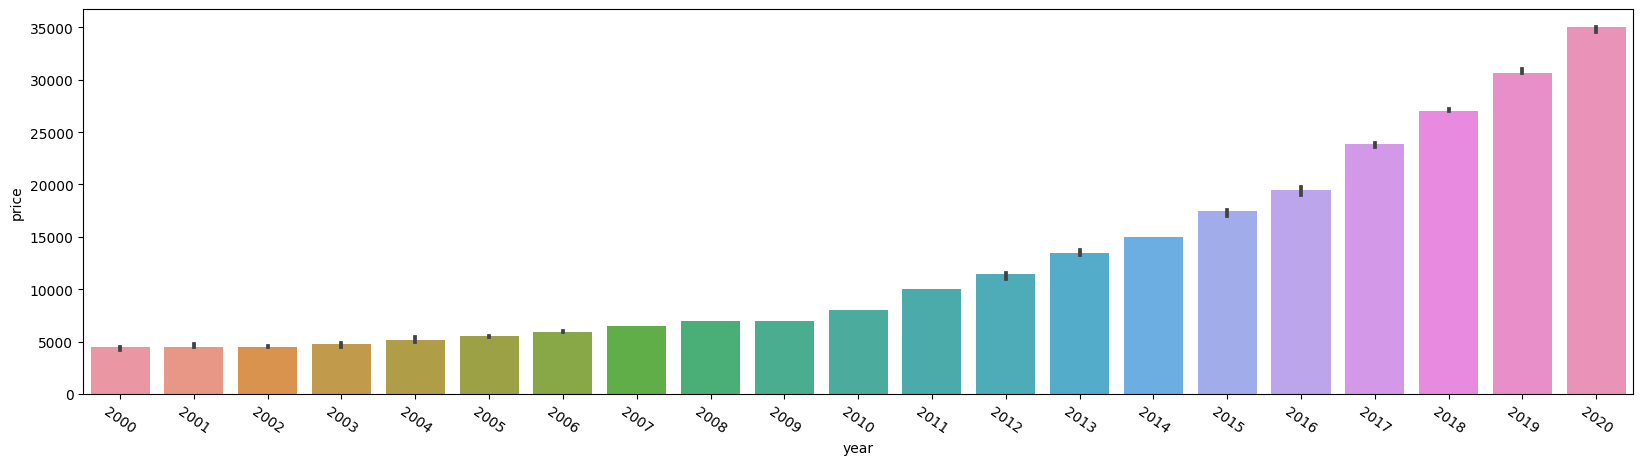

In [10]:
#Compare price by year
from numpy import median

plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= df_year,x="year", y= "price",estimator=median)
plt.show()

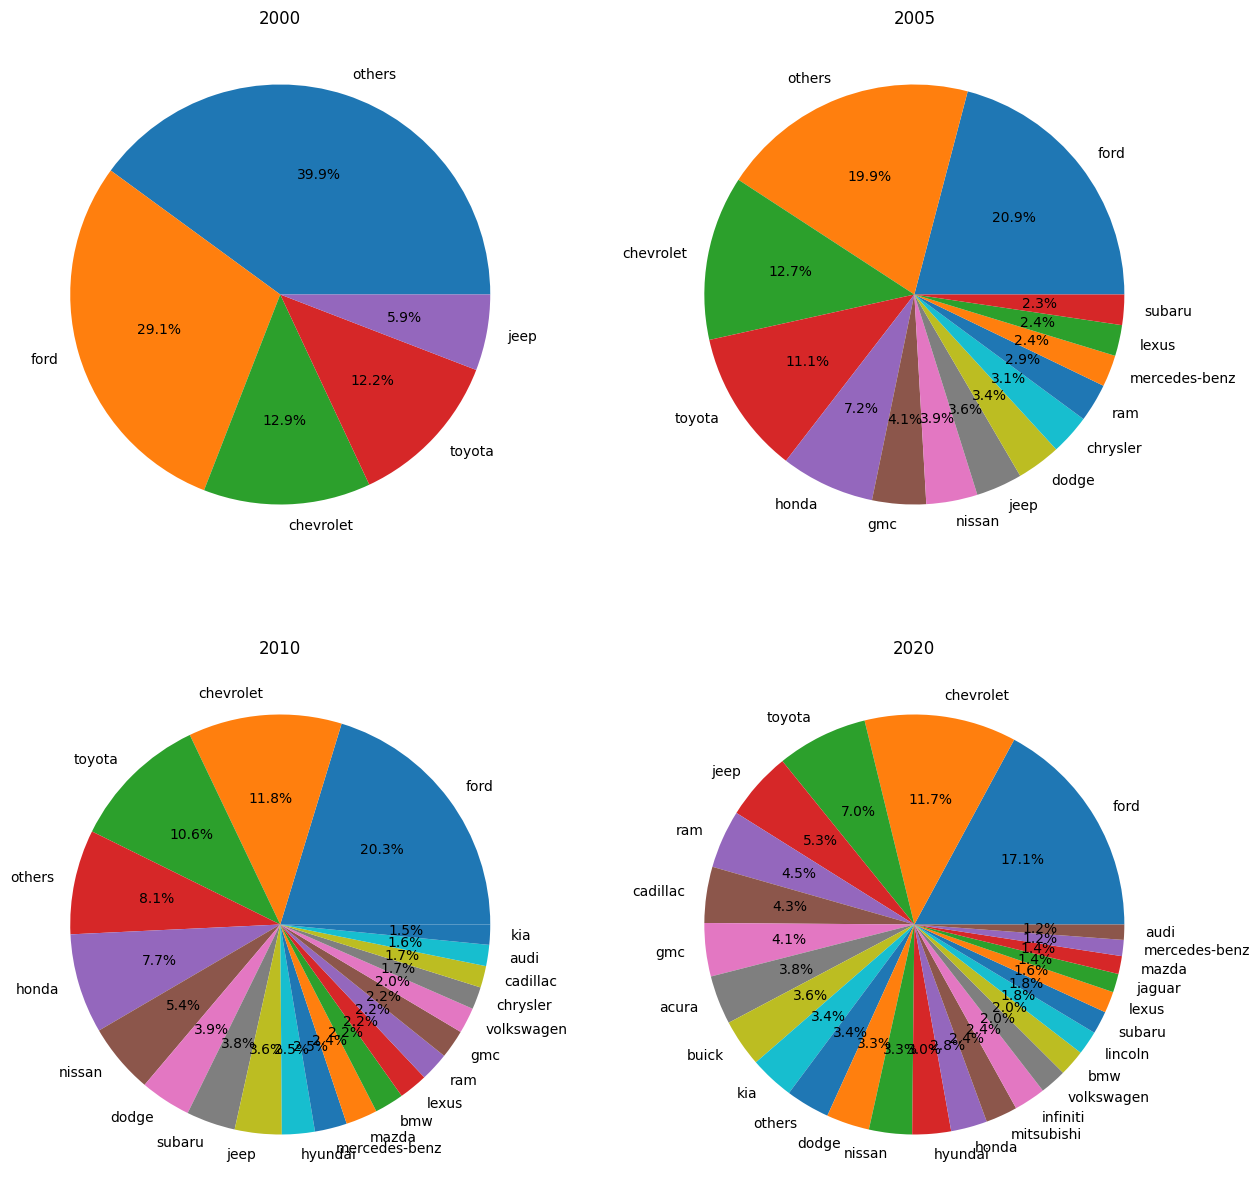

In [11]:
#Changes in manufacturer's share by year
df_year["tmp"] = 1
data = pd.pivot_table(df_year, index = "manufacturer", columns="year",values="tmp",aggfunc=np.sum)
data = data.fillna(0)
data.loc['others'] = data[data<200].sum()
data[data<200] = 0

plt.figure(figsize=(15,15))
tmp_data1 = data[2000].sort_values(ascending=False)
plt.subplot(221)
tmp_data1[tmp_data1>0].plot.pie(autopct="%.1f%%",title="2000")
plt.axis("off")

tmp_data2 = data[2005].sort_values(ascending=False)
plt.subplot(222)
tmp_data2[tmp_data2>0].plot.pie(autopct="%.1f%%",title="2005")
plt.axis("off")

tmp_data3 = data[2010].sort_values(ascending=False)
plt.subplot(223)
tmp_data3[tmp_data3>0].plot.pie(autopct="%.1f%%",title="2010")
plt.axis("off")

tmp_data4 = data[2020].sort_values(ascending=False)
plt.subplot(224)
tmp_data4[tmp_data4>0].plot.pie(autopct="%.1f%%",title="2020")
plt.axis("off")
plt.show()